## Area Plots

---

In [1]:
import os
import sys

# Import the regular expression module
import re

import numpy as np

import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


In [3]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero
------------------------------
 
------------------------------
           src_dir            
/home/intsights/repos/repos-edu/repos-ds-math-python/data-hero/src
------------------------------
 


---

### Datasets used for below plots

In [4]:
medals = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'all_medalists.csv'    
)

medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


---

### Reshape the data

In [5]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by ['Edition', 'Medal'] and aggregate over 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

type(usa_medals_by_year)

pandas.core.series.Series

In [6]:
usa_medals_by_year.head(10)

Edition  Medal 
1896     Bronze      2
         Gold       11
         Silver      7
1900     Bronze     14
         Gold       27
         Silver     14
1904     Bronze    111
         Gold      146
         Silver    137
1908     Bronze     15
Name: Athlete, dtype: int64

In [7]:
# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.head(10)

Medal,Bronze,Gold,Silver
Edition,,,
1896,2,11,7
1900,14,27,14
1904,111,146,137
1908,15,34,14
1912,31,45,25
1920,38,110,45
1924,51,110,37
1928,17,43,24
1932,59,78,44


---
### Line Plot 

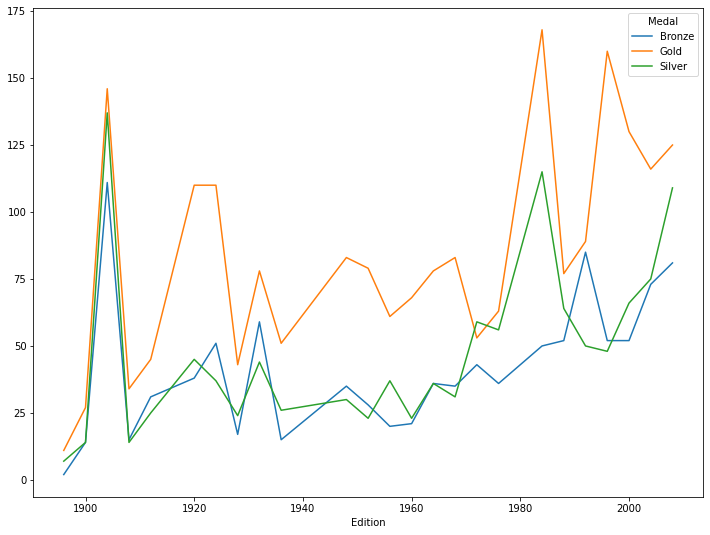

In [8]:
usa_medals_by_year.plot()
plt.show()


---
### Area Plot

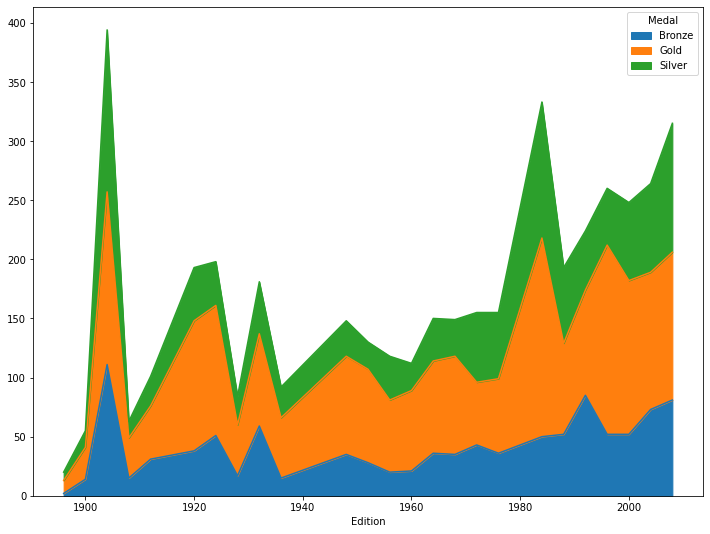

In [9]:
usa_medals_by_year.plot.area()
plt.show()

---
### Area Plot with Ordered Medals

In [10]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(
    values     = medals.Medal, 
    categories = ['Bronze', 'Silver', 'Gold'], 
    ordered    = True
)

medals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   City          29216 non-null  object  
 1   Edition       29216 non-null  int64   
 2   Sport         29216 non-null  object  
 3   Discipline    29216 non-null  object  
 4   Athlete       29216 non-null  object  
 5   NOC           29216 non-null  object  
 6   Gender        29216 non-null  object  
 7   Event         29216 non-null  object  
 8   Event_gender  29216 non-null  object  
 9   Medal         29216 non-null  category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


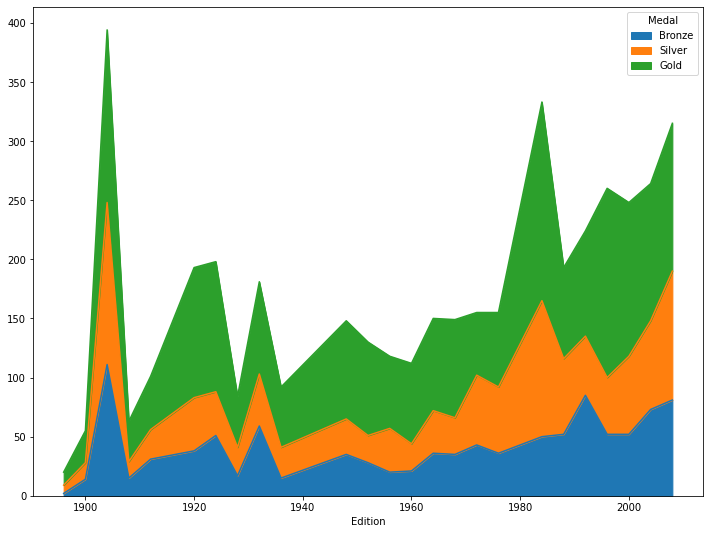

In [11]:
# Create the DataFrame: usa
usa = medals[medals.NOC == 'USA']

# Group usa by 'Edition', 'Medal', and 'Athlete'
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape usa_medals_by_year by unstacking
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

# Create an area plot of usa_medals_by_year
usa_medals_by_year.plot.area()
plt.show()
